In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
dataset = pd.read_csv('/content/electricityConsumptionAndProductioction.csv')
dataset.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [3]:
# Convert the 'Timestamp' column to datetime format
# This enables datetime operations like sorting, filtering, and time-based analysis
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])

In [4]:
# Print the number of unique columns in the dataset
print(f"column no : {len(dataset.columns.unique())}")

# Print the total number of rows in the dataset
print(f"row no : {len(dataset.index)}")

column no : 10
row no : 54170


In [5]:
# Check the number of missing (null) values in each column of the dataset
dataset.isnull().sum()

,0
DateTime,0
Consumption,0
Production,0
Nuclear,0
Wind,0
Hydroelectric,0
Oil and Gas,0
Coal,0
Solar,0
Biomass,0


In [6]:
# Check if there is any missing (null) value in each column (returns True/False)
dataset.isnull().any()

,0
DateTime,False
Consumption,False
Production,False
Nuclear,False
Wind,False
Hydroelectric,False
Oil and Gas,False
Coal,False
Solar,False
Biomass,False


In [7]:
# Get a concise summary of the dataset including data types, non-null counts, and memory usage
print(dataset.info())

print("--------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------")
# Generate descriptive statistics for numerical columns: count, mean, std, min, quartiles, max
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54170 entries, 0 to 54169
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       54170 non-null  datetime64[ns]
 1   Consumption    54170 non-null  int64         
 2   Production     54170 non-null  int64         
 3   Nuclear        54170 non-null  int64         
 4   Wind           54170 non-null  int64         
 5   Hydroelectric  54170 non-null  int64         
 6   Oil and Gas    54170 non-null  int64         
 7   Coal           54170 non-null  int64         
 8   Solar          54170 non-null  int64         
 9   Biomass        54170 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 4.1 MB
None
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                            DateTime   Consumption    P

DateTime         54160
Consumption       5008
Production        5233
Nuclear            607
Wind              2764
Hydroelectric     3580
Oil and Gas       1869
Coal              1888
Solar             1229
Biomass             73
dtype: int64


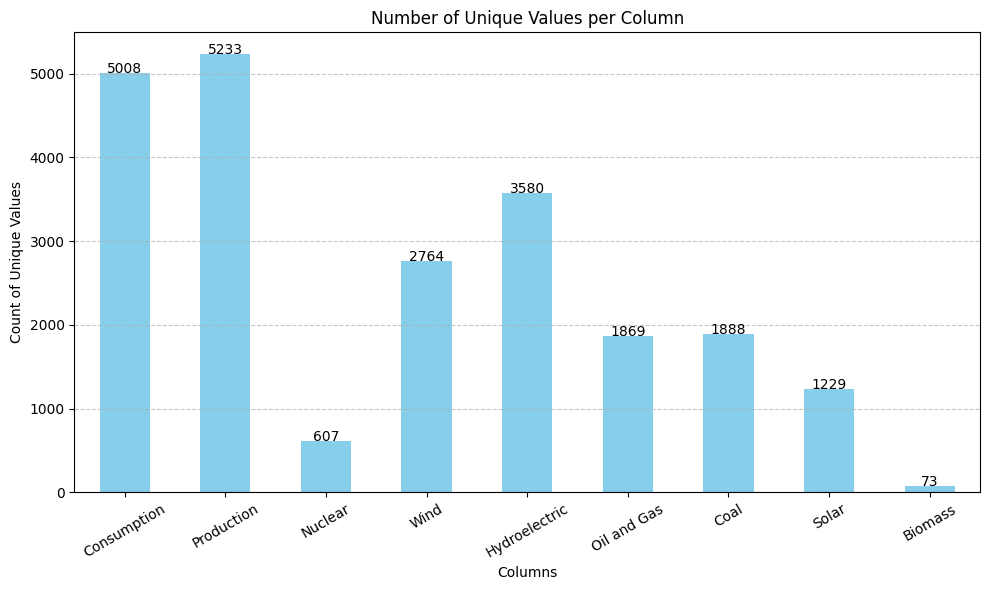

In [8]:
import matplotlib.pyplot as plt

# Print the number of unique values in each column of the dataset
print(dataset.nunique())

# Get unique counts
datasetunique = dataset.drop(['DateTime'], axis=1)
unique_counts = datasetunique.nunique()

# Create bar plot
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')

# Customize plot
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(unique_counts):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.tight_layout()
plt.show()

/tmp/ipython-input-9-1880118948.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_by_source, x='Energy Source', y='Total Production', edgecolor='black', palette='Set2')


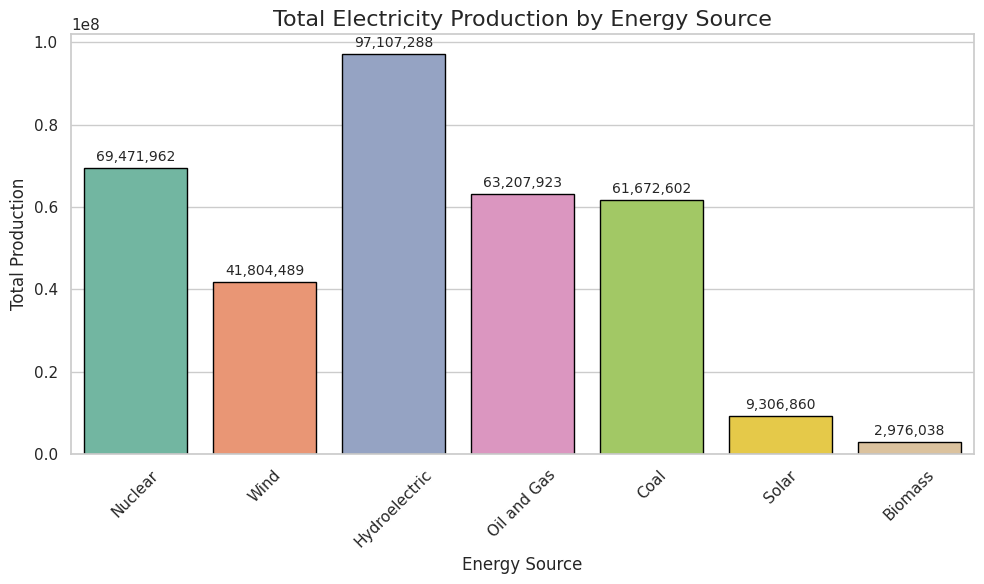

In [9]:
import seaborn as sns
# Prepare the data
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
total_by_source = dataset[energy_sources].sum().reset_index()
total_by_source.columns = ['Energy Source', 'Total Production']

# Set the visual style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_by_source, x='Energy Source', y='Total Production', edgecolor='black', palette='Set2')

# Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(total_by_source['Total Production']) * 0.01,
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add titles and labels
plt.title('Total Electricity Production by Energy Source', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

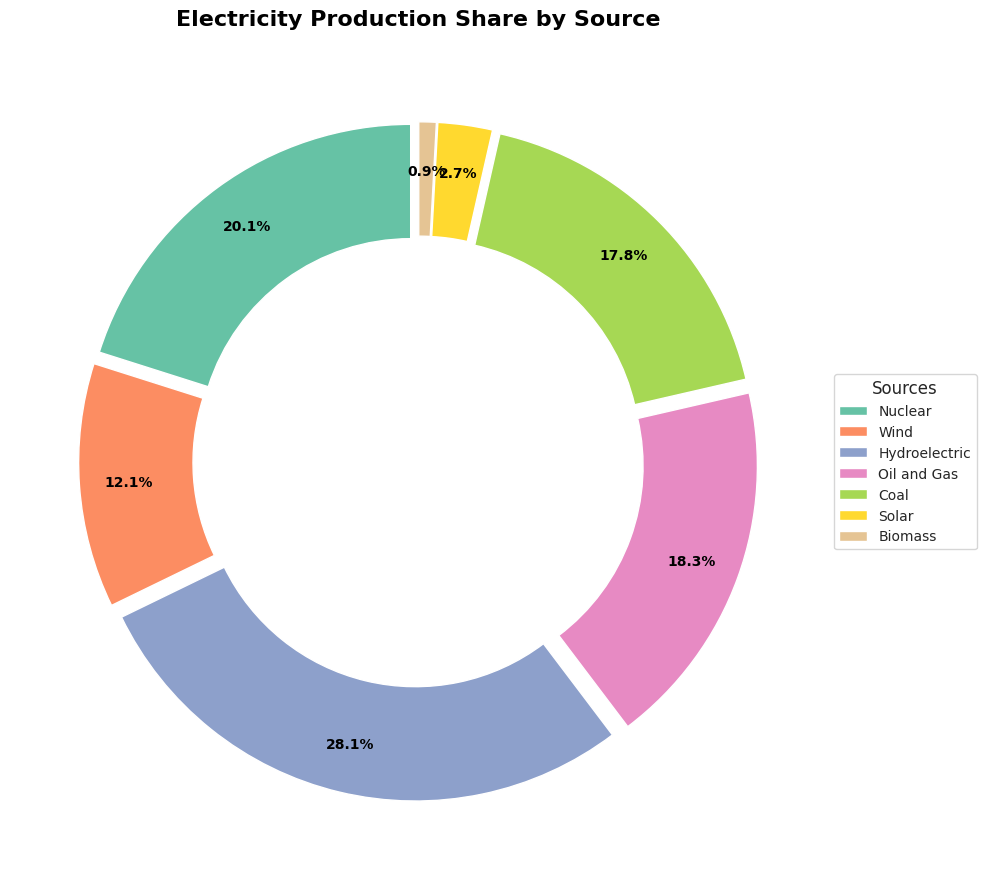

In [10]:
# Total production by source
total_production_by_source = dataset[energy_sources].sum()

# Custom vibrant color palette
colors = sns.color_palette("Set2", len(energy_sources))

# Explode slices slightly
explode = [0.04] * len(energy_sources)

# Pie chart with outer labels and donut center
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    total_production_by_source,
    autopct='%1.1f%%',
    pctdistance=0.85,
    explode=explode,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.35, edgecolor='white'),
    textprops=dict(color='black', fontsize=11)
)

# Add center circle
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
ax.add_artist(centre_circle)

# Add a legend outside
ax.legend(wedges, energy_sources, title="Sources", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

# Title styling
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Electricity Production Share by Source", fontsize=16, fontweight='bold', color='black', pad=20)

plt.tight_layout()
plt.show()

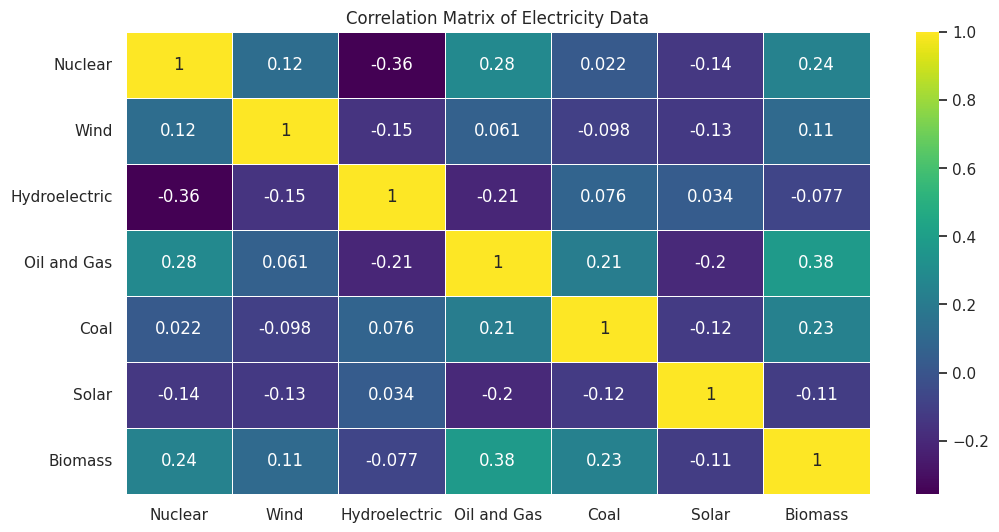

In [11]:
plt.figure(figsize=(12, 6))
datasetx = dataset.drop(['Consumption', 'Production',"DateTime"], axis=1)
corr = datasetx.corr()
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)

plt.title('Correlation Matrix of Electricity Data')
plt.show()


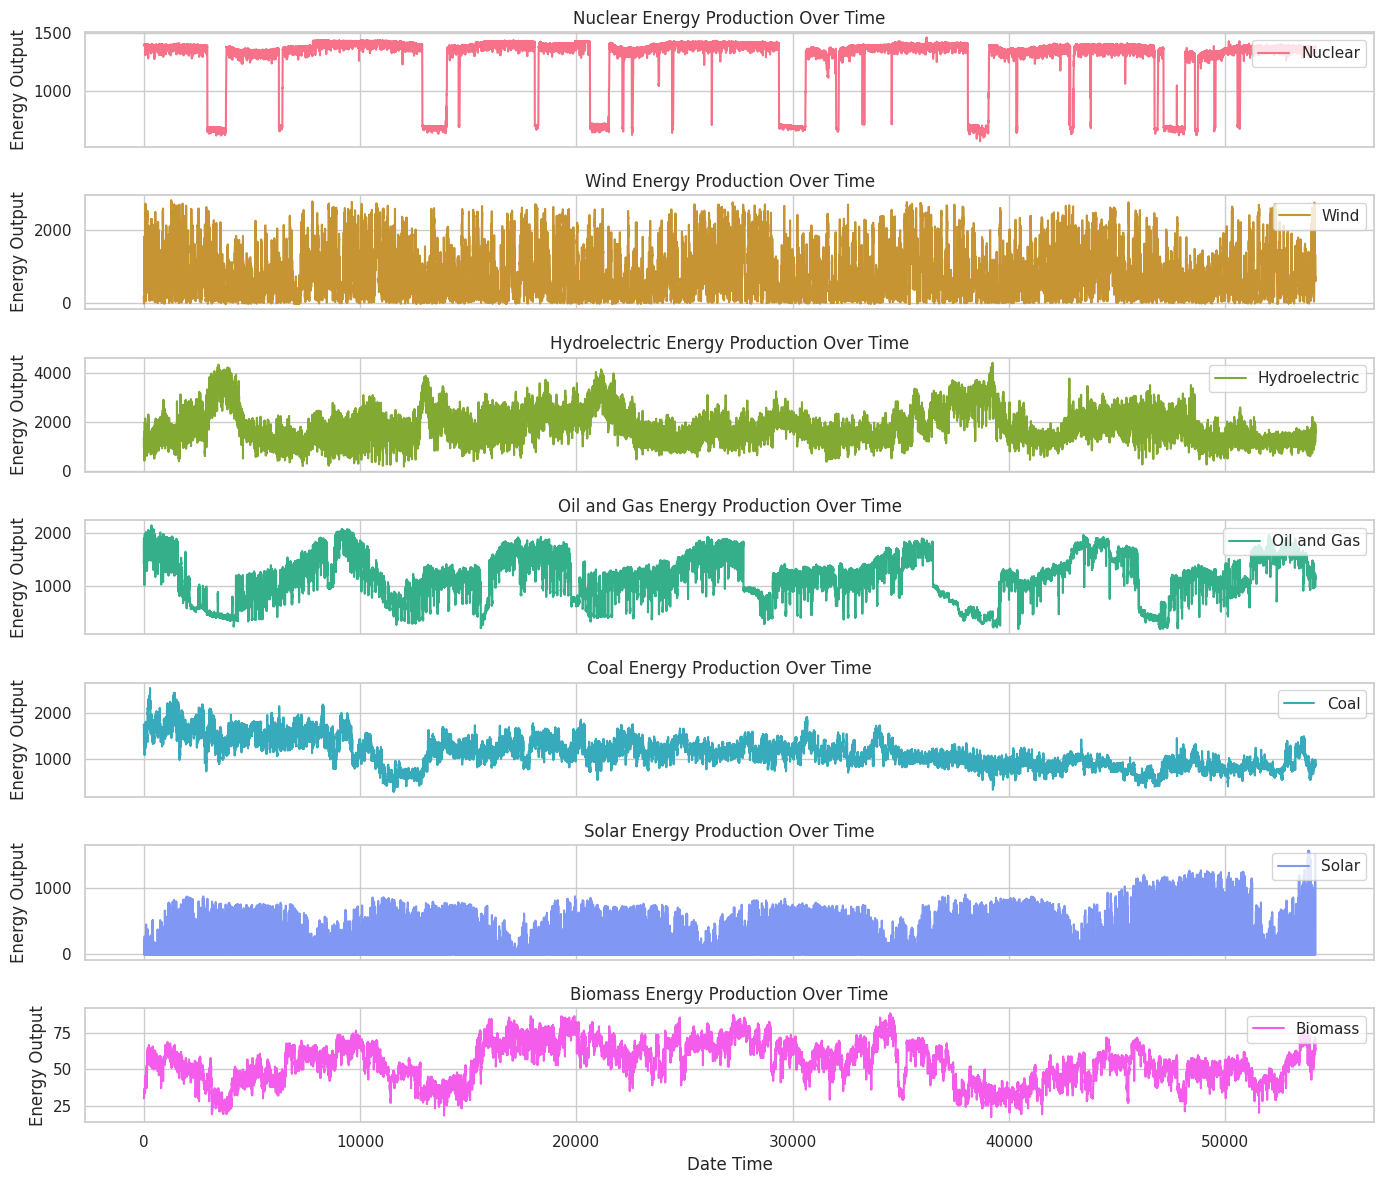

In [12]:
# Seaborn style
sns.set(style='whitegrid')

# Define energy sources and create a unique color for each
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
colors = sns.color_palette('husl', len(energy_sources))  # Distinct hues

# Create subplots
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(14, 12), sharex=True)

# Plot each energy source with a unique color
for i, (source, color) in enumerate(zip(energy_sources, colors)):
    sns.lineplot(ax=axes[i], x=dataset.index, y=dataset[source], label=source, color=color)
    axes[i].set_ylabel('Energy Output')
    axes[i].set_title(f'{source} Energy Production Over Time', fontsize=12)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Set common x-axis label
axes[-1].set_xlabel('Date Time', fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()

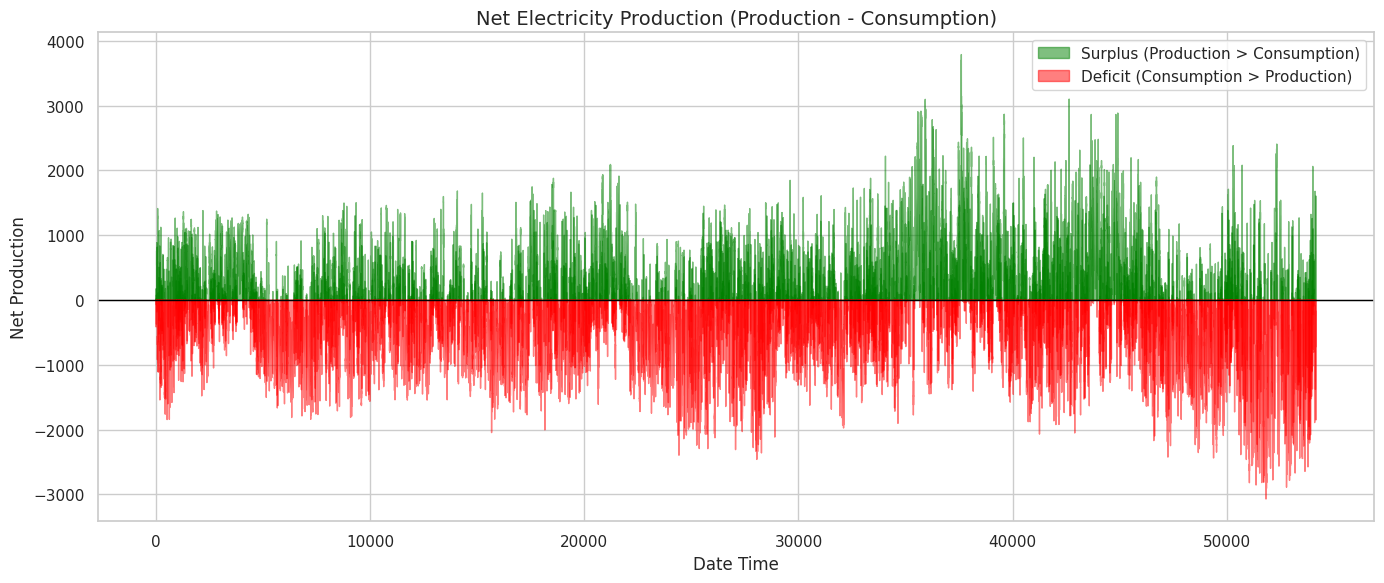

In [13]:
# Calculate the net production
dataset['Net_Production'] = dataset['Production'] - dataset['Consumption']

# Create the plot
plt.figure(figsize=(14, 6))
plt.axhline(0, color='black', linewidth=1)  # Zero line

# Plot areas: green for surplus, red for deficit
plt.fill_between(dataset.index, dataset['Net_Production'], where=(dataset['Net_Production'] >= 0),
                 interpolate=True, color='green', alpha=0.5, label='Surplus (Production > Consumption)')
plt.fill_between(dataset.index, dataset['Net_Production'], where=(dataset['Net_Production'] < 0),
                 interpolate=True, color='red', alpha=0.5, label='Deficit (Consumption > Production)')

# Add labels and title
plt.title('Net Electricity Production (Production - Consumption)', fontsize=14)
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('Net Production', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

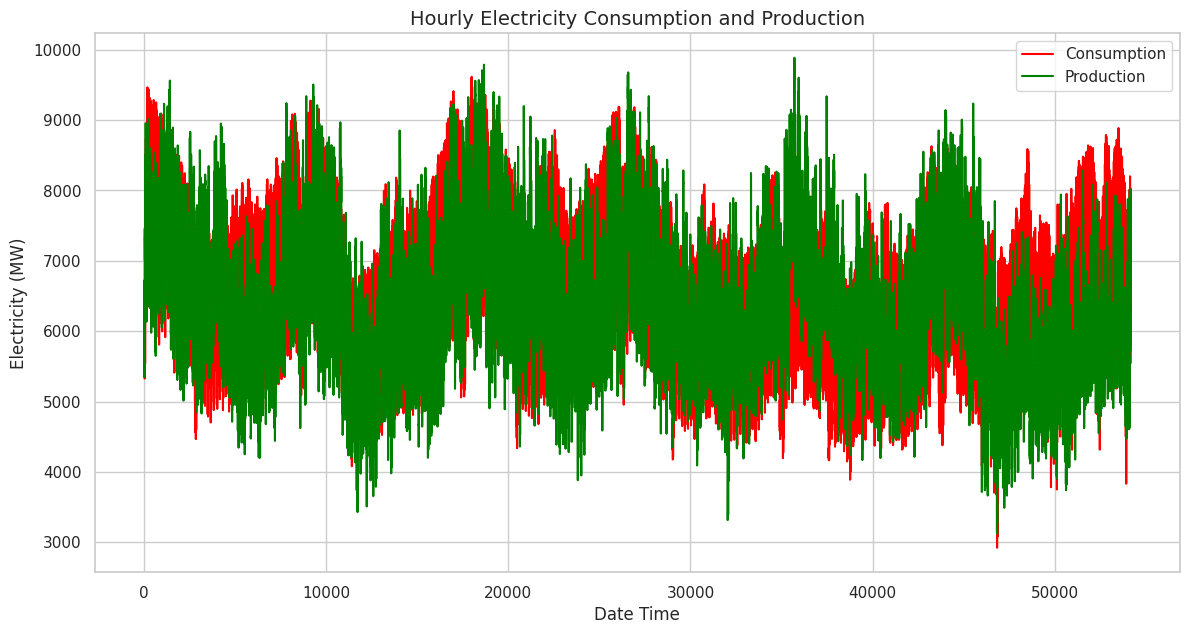

In [14]:
# Create the line plot for Consumption and Production
plt.figure(figsize=(14, 7))
plt.plot(dataset.index, dataset['Consumption'], label='Consumption', color='red')
plt.plot(dataset.index, dataset['Production'], label='Production', color='green')

# Styling the plot
plt.xlabel('Date Time', fontsize=12)
plt.ylabel('Electricity (MW)', fontsize=12)
plt.title('Hourly Electricity Consumption and Production', fontsize=14)
plt.legend()
plt.grid(True)


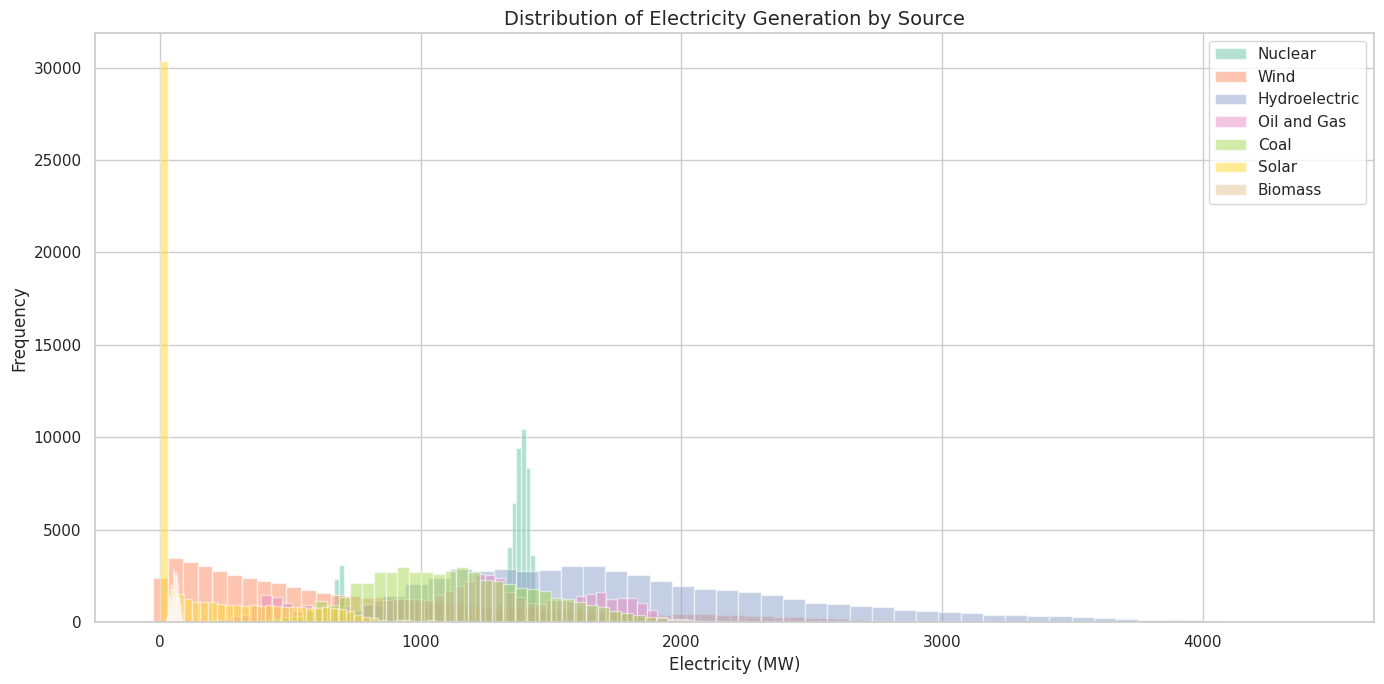

In [15]:
# Define all energy production sources
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Set Seaborn color palette
colors = sns.color_palette('Set2', len(energy_sources))

# Create the histogram
plt.figure(figsize=(14, 7))

for source, color in zip(energy_sources, colors):
    plt.hist(dataset[source], bins=50, alpha=0.5, label=source, color=color)

# Plot styling
plt.xlabel('Electricity (MW)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Electricity Generation by Source', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

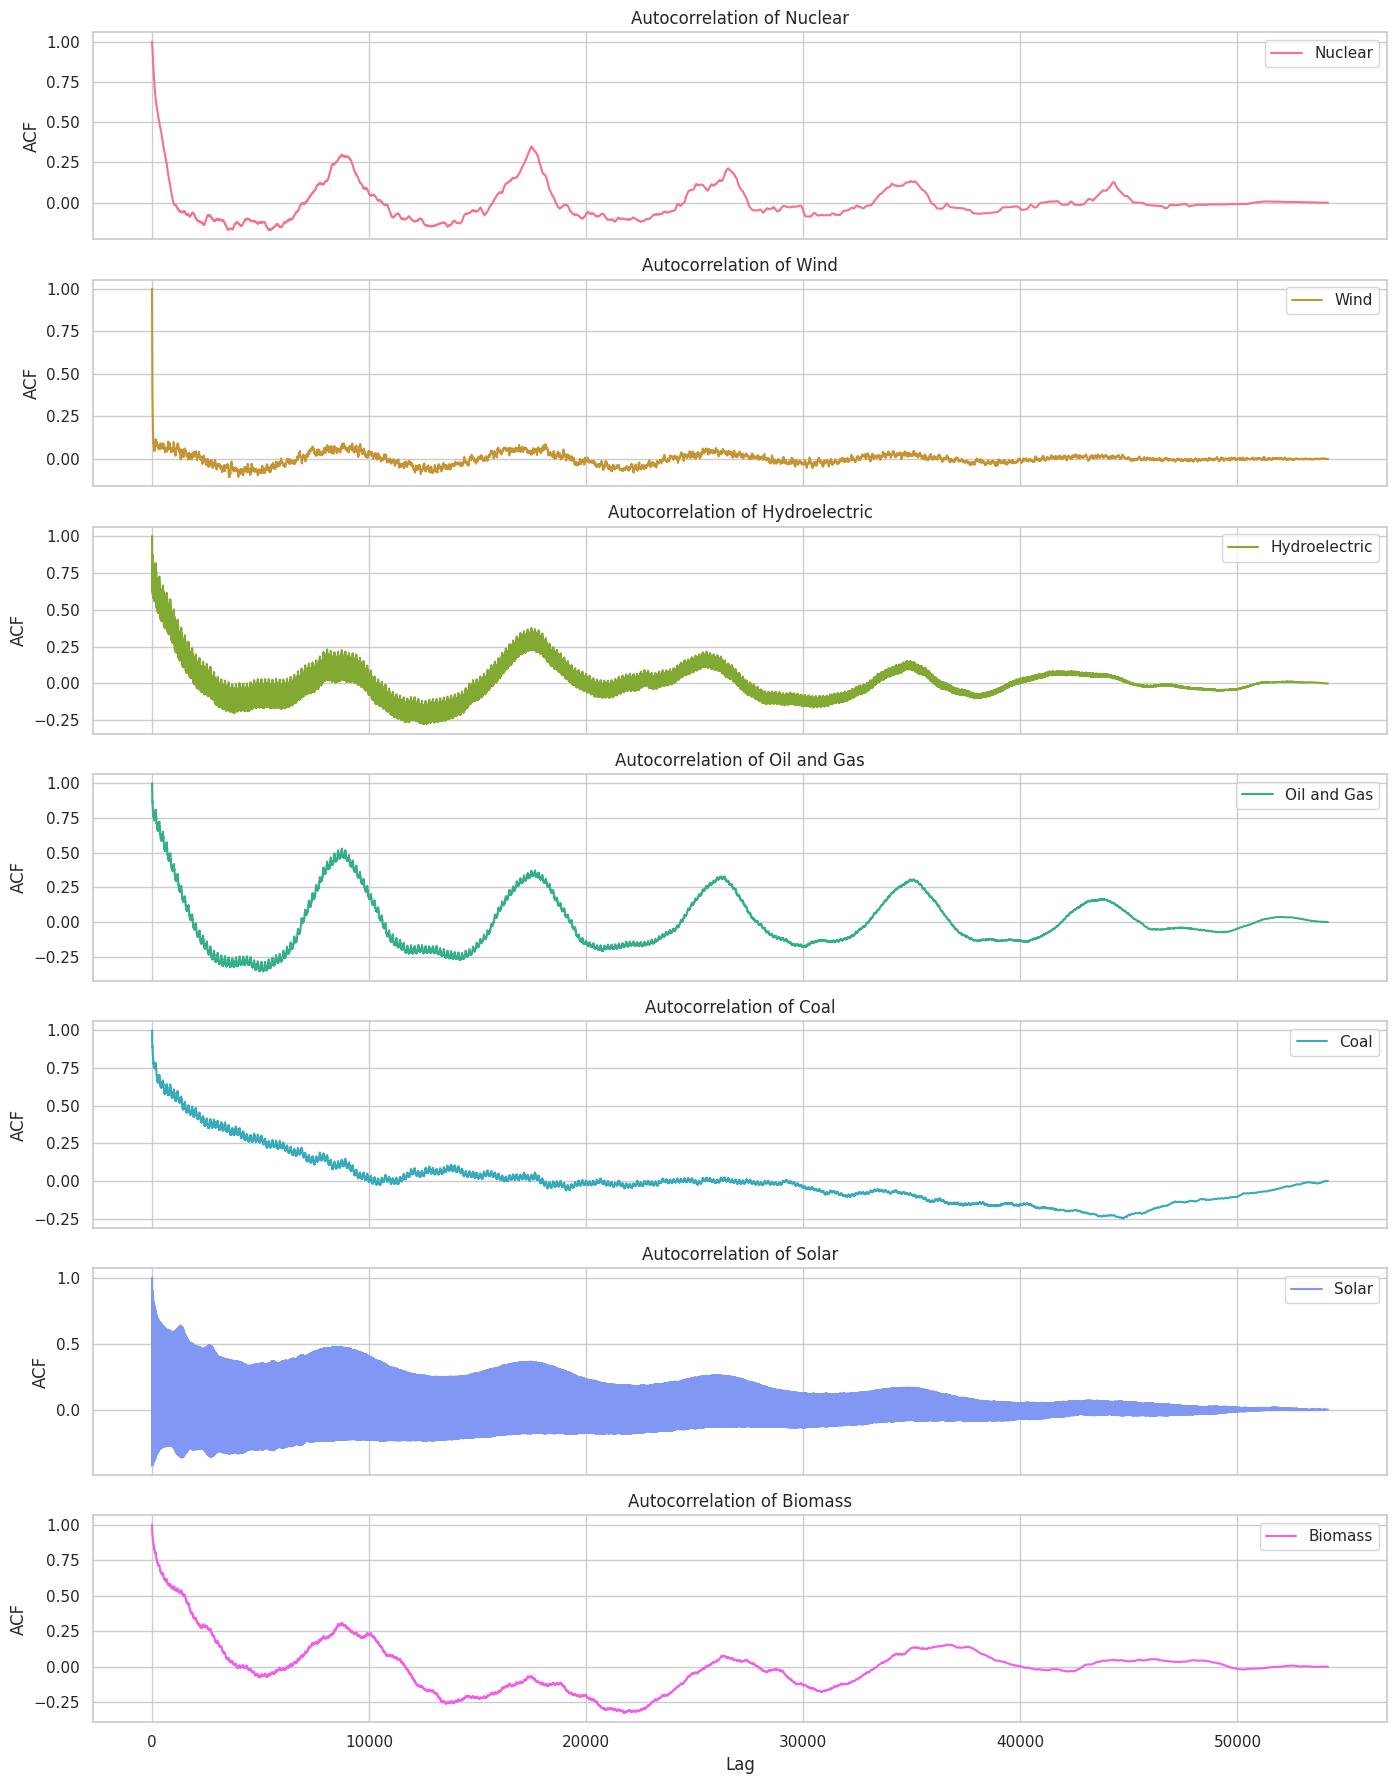

In [16]:
from statsmodels.tsa.stattools import acf

# Apply Seaborn style
sns.set(style='whitegrid')

# Define energy sources and colors
energy_sources = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
colors = sns.color_palette('husl', len(energy_sources))  # Unique hues

# Set max lag
max_lag = 100000

# Create subplots
fig, axes = plt.subplots(nrows=len(energy_sources), ncols=1, figsize=(14, 18), sharex=True)

# Generate autocorrelation plots
for i, (source, color) in enumerate(zip(energy_sources, colors)):
    acf_vals = acf(dataset[source], nlags=max_lag, fft=True)
    lags = range(len(acf_vals))

    axes[i].plot(lags, acf_vals, color=color, label=source)
    axes[i].set_title(f'Autocorrelation of {source}', fontsize=12)
    axes[i].set_ylabel('ACF')
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

# Common X-axis label
axes[-1].set_xlabel('Lag', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# --- 1. Normalize the data ---
scaler = MinMaxScaler()
features = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']
scaled_df = scaler.fit_transform(dataset[features])
scaled_df = pd.DataFrame(scaled_df, columns=features)

# --- 2. Create sequences for RNN ---
def create_sequences(df, seq_length):
    sequences = []
    labels = []
    for i in range(len(df) - seq_length):
        seq = df.iloc[i:i+seq_length].values
        label = df['Consumption'].iloc[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 24  # 24-hour sequences
sequences, labels = create_sequences(scaled_df, SEQ_LENGTH)

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, shuffle=False)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU, Dense, Bidirectional
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


**RNN IMPLEMENTATION**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0118 - val_loss: 9.5835e-04
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 9.4018e-04 - val_loss: 0.0022
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 8.4135e-04 - val_loss: 5.2320e-04
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 6.4566e-04 - val_loss: 6.3649e-04
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 5.9256e-04 - val_loss: 4.3531e-04
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 6.1146e-04 - val_loss: 4.0755e-04
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 5.4533e-04 - val_loss: 5.2010e-04
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 4.8070e-04 - val_loss: 3.4539e-04
Epoch 9/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.8804e-04 - val_loss: 7.1306e-04
Epoch 10/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 5.0564e-04 - val_loss: 3.4122e-04
Epoch 11/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━

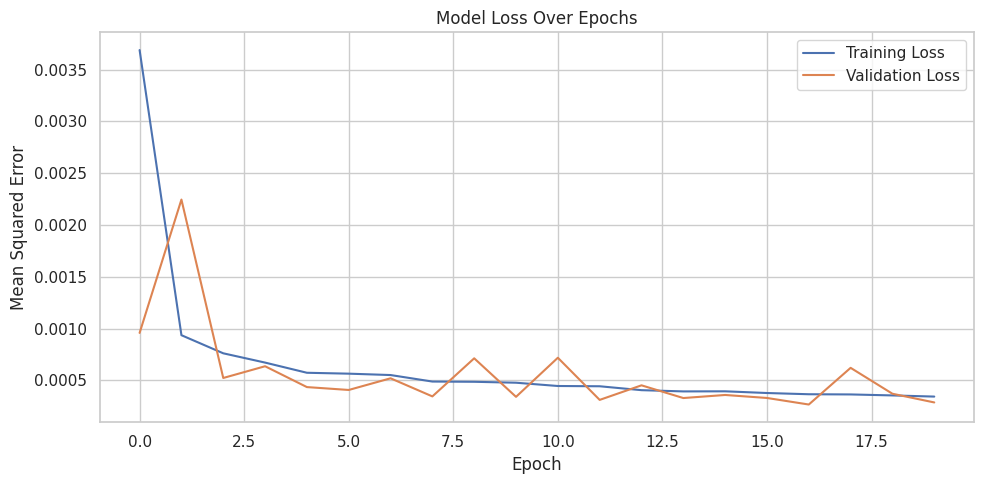

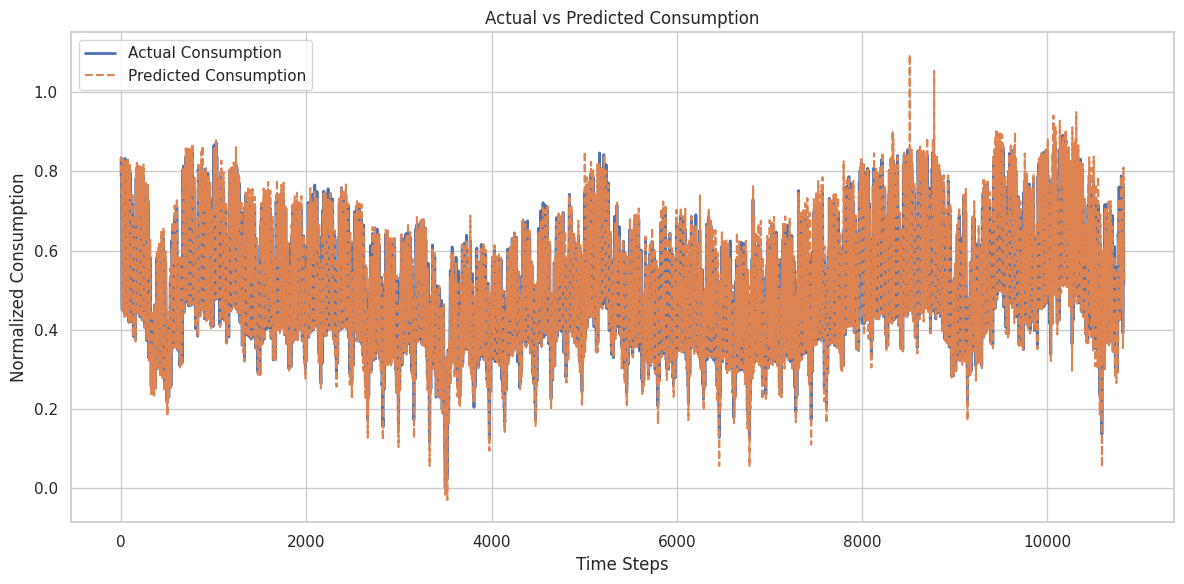

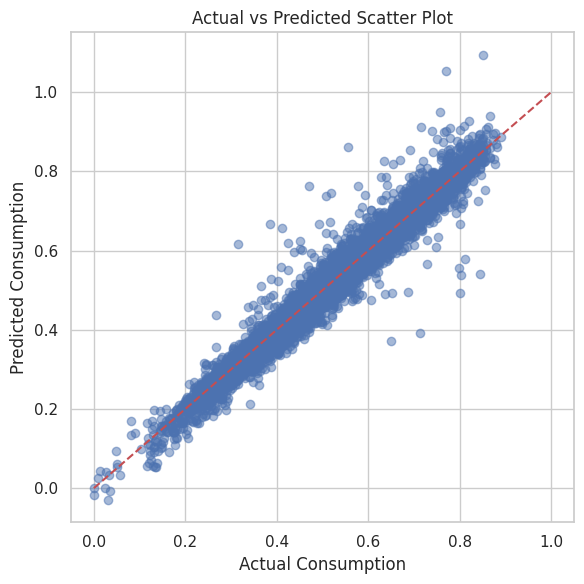

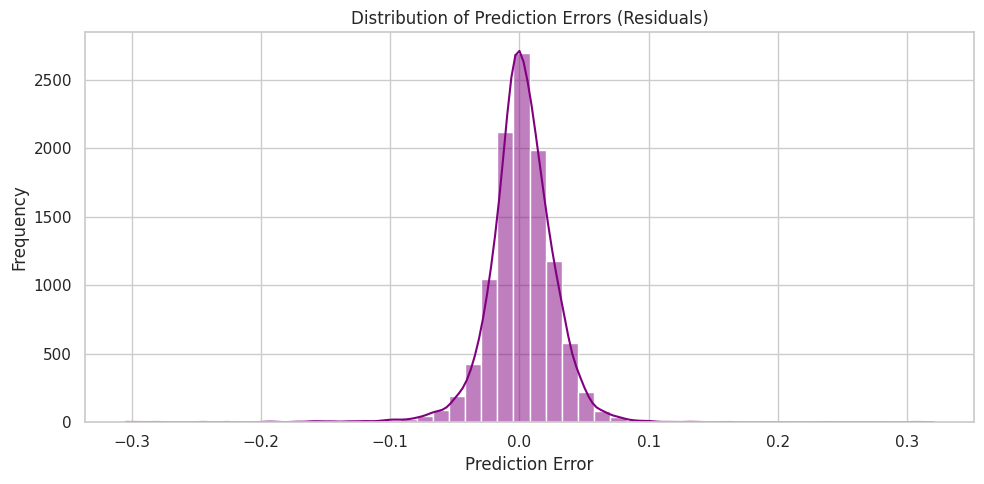

In [19]:


# ---  Define and Compile the RNN Model ---
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    SimpleRNN(50),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# ---  Train the Model ---
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ---  Make Predictions ---
rnn_predictions = rnn_model.predict(X_test)

# ---  Evaluation Metrics ---
rnn_r2 = r2_score(y_test, rnn_predictions)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_rmse = np.sqrt(rnn_mse)

print(f'Simple RNN - R² Score: {rnn_r2:.4f}')
print(f'Simple RNN - Mean Absolute Error (MAE): {rnn_mae:.4f}')
print(f'Simple RNN - Mean Squared Error (MSE): {rnn_mse:.4f}')
print(f'Simple RNN - Root Mean Squared Error (RMSE): {rnn_rmse:.4f}')

# ---  Visualize Training and Prediction Results ---

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Consumption', linewidth=2)
plt.plot(rnn_predictions, label='Predicted Consumption', linestyle='--')
plt.title('Actual vs Predicted Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rnn_predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal prediction line
plt.title('Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

# Error Distribution
residuals = y_test - rnn_predictions.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**LSTM IMPLEMENTATION**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0124 - val_loss: 0.0015
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0013 - val_loss: 6.6491e-04
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 6.8027e-04 - val_loss: 4.5533e-04
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 5.0383e-04 - val_loss: 7.4725e-04
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4.4083e-04 - val_loss: 4.5716e-04
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4.1235e-04 - val_loss: 5.5062e-04
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 3.9485e-04 - val_loss: 3.5584e-04
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 3.8980e-04 - val_loss: 3.8097e-04
Epoch 9/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 3.5662e-04 - val_loss: 3.0064e-04
Epoch 10/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 3.6282e-04 - val_loss: 3.7600e-04
Epoch 11/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step -

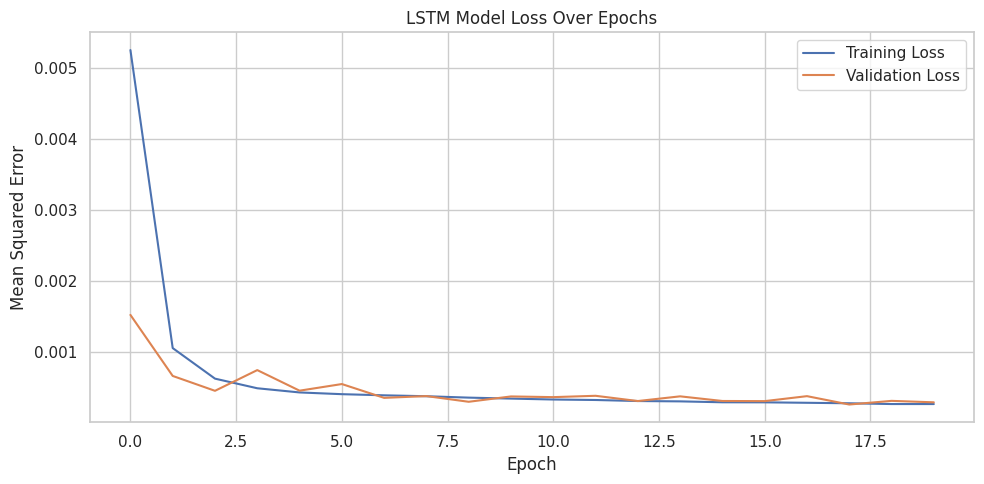

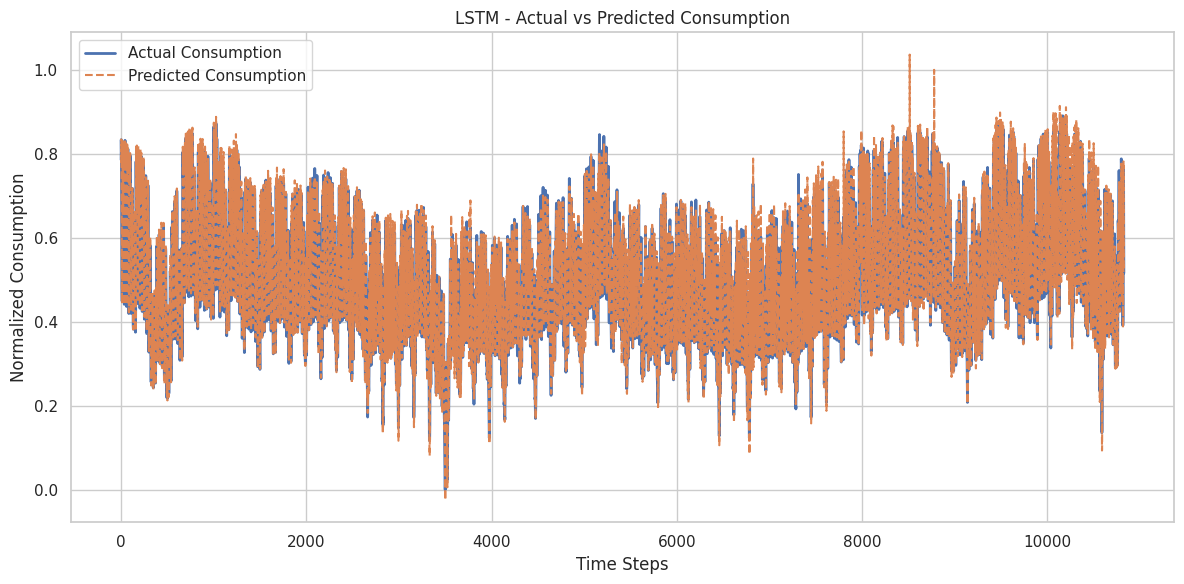

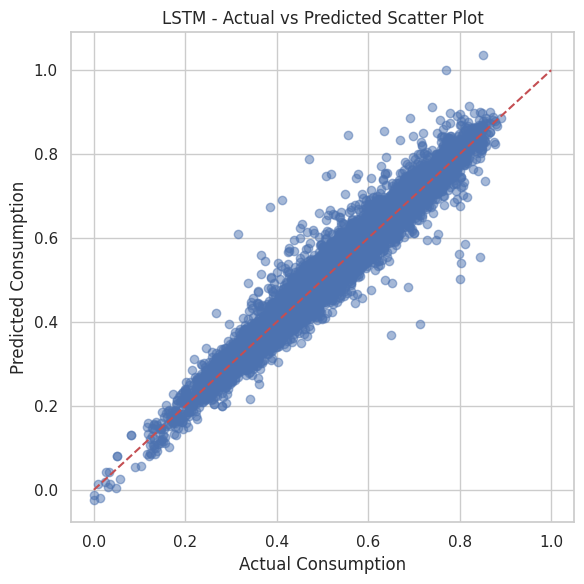

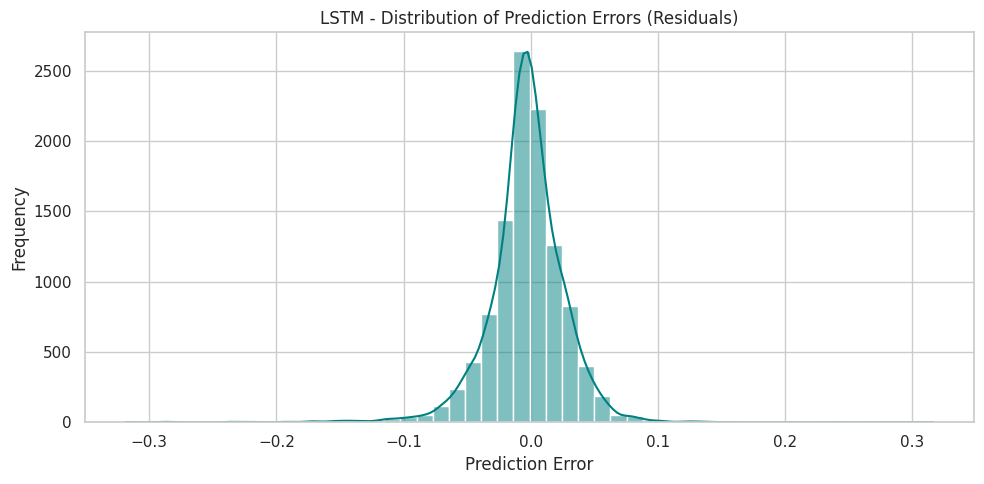

In [20]:
# ---  Define and Compile the LSTM Model ---
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# ---  Train the LSTM Model ---
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ---  Make Predictions ---
lstm_predictions = lstm_model.predict(X_test)

# ---  Evaluation Metrics ---
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

print(f'LSTM - R² Score: {lstm_r2:.4f}')
print(f'LSTM - Mean Absolute Error (MAE): {lstm_mae:.4f}')
print(f'LSTM - Mean Squared Error (MSE): {lstm_mse:.4f}')
print(f'LSTM - Root Mean Squared Error (RMSE): {lstm_rmse:.4f}')

# ---  Visualize Training and Prediction Results ---

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Consumption', linewidth=2)
plt.plot(lstm_predictions, label='Predicted Consumption', linestyle='--')
plt.title('LSTM - Actual vs Predicted Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, lstm_predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal prediction line
plt.title('LSTM - Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

# Error Distribution
residuals = y_test - lstm_predictions.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color='teal')
plt.title('LSTM - Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0136 - val_loss: 6.4365e-04
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.5334e-04 - val_loss: 5.2873e-04
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6.6697e-04 - val_loss: 6.5056e-04
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 5.7495e-04 - val_loss: 5.7079e-04
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5.3321e-04 - val_loss: 5.1165e-04
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 4.8299e-04 - val_loss: 5.1928e-04
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 4.7759e-04 - val_loss: 4.1842e-04
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.3272e-04 - val_loss: 3.7947e-04
Epoch 9/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.0017e-04 - val_loss: 4.8928e-04
Epoch 10/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.8852e-04 - val_loss: 3.4637e-04
Epoch 11/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 8s 

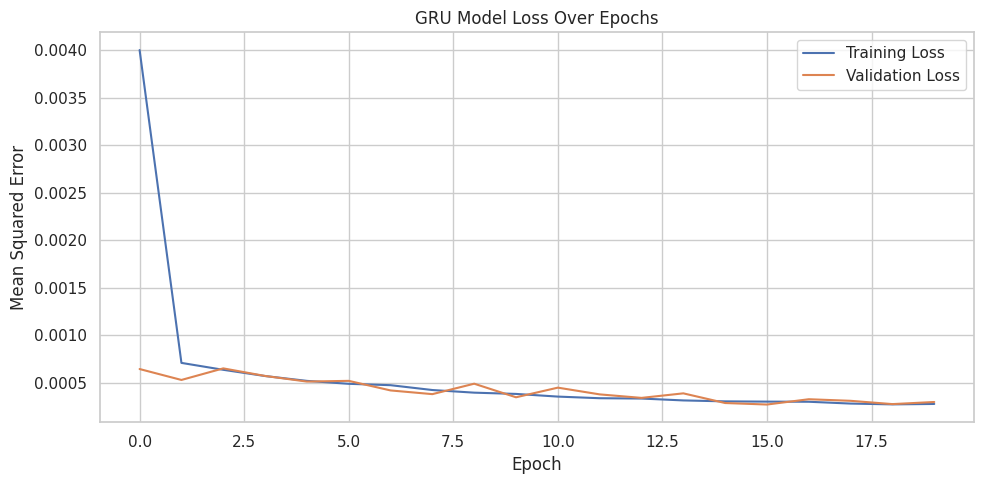

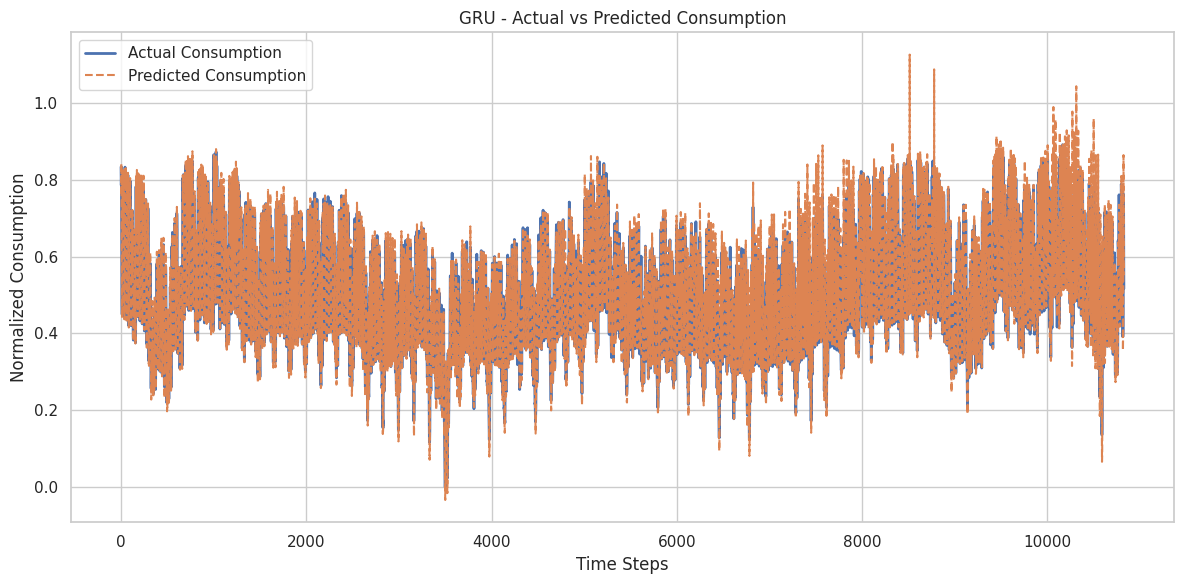

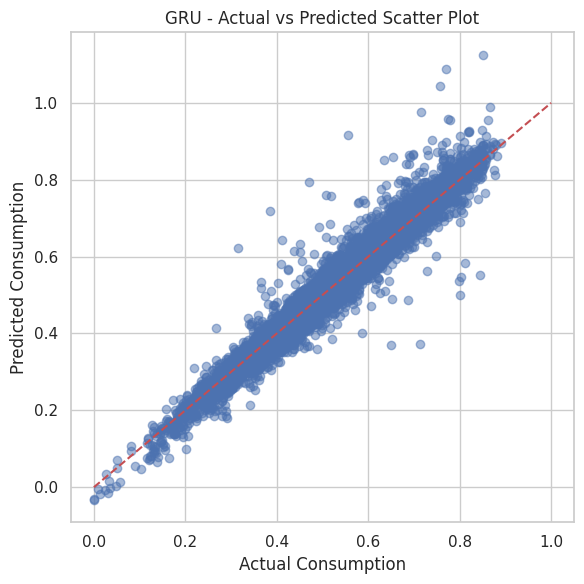

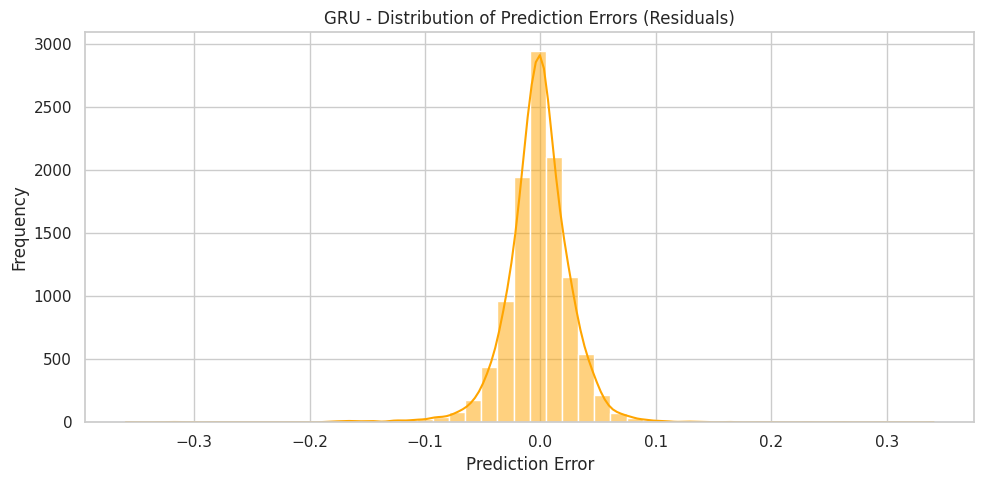

In [21]:
# ---  Define and Compile the GRU Model ---
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    GRU(50),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# ---  Train the GRU Model ---
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# ---  Make Predictions ---
gru_predictions = gru_model.predict(X_test)

# ---  Evaluation Metrics ---
gru_r2 = r2_score(y_test, gru_predictions)
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_mse = mean_squared_error(y_test, gru_predictions)
gru_rmse = np.sqrt(gru_mse)

print(f'GRU - R² Score: {gru_r2:.4f}')
print(f'GRU - Mean Absolute Error (MAE): {gru_mae:.4f}')
print(f'GRU - Mean Squared Error (MSE): {gru_mse:.4f}')
print(f'GRU - Root Mean Squared Error (RMSE): {gru_rmse:.4f}')

# ---  Visualize Training and Prediction Results ---

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Actual vs Predicted (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Consumption', linewidth=2)
plt.plot(gru_predictions, label='Predicted Consumption', linestyle='--')
plt.title('GRU - Actual vs Predicted Consumption')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, gru_predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal prediction line
plt.title('GRU - Actual vs Predicted Scatter Plot')
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

# Error Distribution
residuals = y_test - gru_predictions.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title('GRU - Distribution of Prediction Errors (Residuals)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Model Performance Comparison:
  Model        R²       MAE       MSE      RMSE
0   RNN  0.965976  0.018754  0.000774  0.027816
1  LSTM  0.957680  0.021208  0.000962  0.031021
2   GRU  0.959681  0.020224  0.000917  0.030279


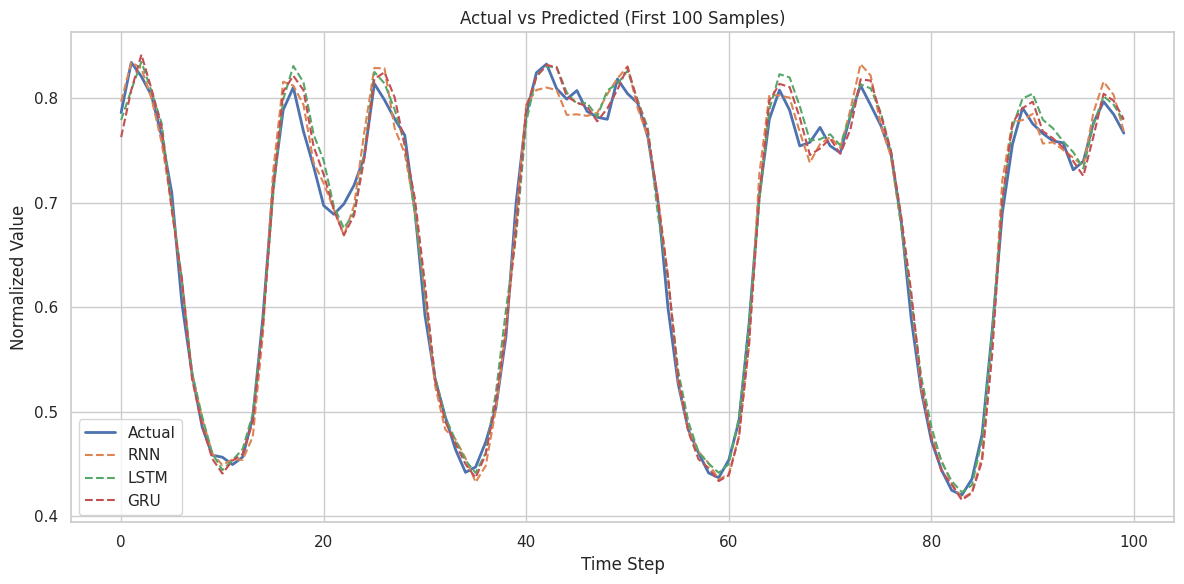

In [ ]:


# --- 1. Evaluation Function ---
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'R²': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

# --- 2. Collect Results ---
results = [
    evaluate_model("RNN", y_test, rnn_predictions),
    evaluate_model("LSTM", y_test, lstm_predictions),
    evaluate_model("GRU", y_test, gru_predictions),
]

results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(results_df)

# --- 3. Actual vs Predicted Plot ---
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Actual", linewidth=2)
plt.plot(rnn_predictions[:100], label="RNN", linestyle="--")
plt.plot(lstm_predictions[:100], label="LSTM", linestyle="--")
plt.plot(gru_predictions[:100], label="GRU", linestyle="--")
plt.title("Actual vs Predicted (First 100 Samples)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4. Residuals KDE Plot ---
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test - rnn_predictions, label="RNN")
sns.kdeplot(y_test - lstm_predictions, label="LSTM")
sns.kdeplot(y_test - gru_predictions, label="GRU")
plt.title("Residual Distribution (Prediction Error)")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()